In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [102]:
#df=pd.ExcelFile('slr04.xls')
#df = pd.read_excel(open('slr05.xls','rb'), sheetname='Sheet 1')
xls=pd.ExcelFile('slr05.xls')
dfa=pd.read_excel(xls,'Sheet 1')

# X = fires per 1000 housing units
# Y = thefts per 1000 population

a=np.array(dfa[['X']])
c=np.array(dfa[['Y']])

# print(a.shape)
# print(b.shape)
# print((b*a).shape)#1x1 shape does not work in numpy
# print(a+b)
#print(a.shape[0])

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [94]:
#y=Wx+b
#W,b are weights i.e. variables
#x is input i.e. placeholder

W=tf.Variable(np.random.randn,dtype=tf.float32,name="weight")
b=tf.Variable(np.random.randn,dtype=tf.float32,name="bias")

X=tf.placeholder(tf.float32)#later use [None,1]
Y=tf.placeholder(tf.float32,name="predicted_output")

#y_=tf.placeholder(tf.float32,name="actual_output")#used for computing accuracy

N=c.shape[0]

In [113]:
init = tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)


#applying linear regression

#we will be using mean squared error as the cost function

pred=X*W + b#predicted output

num= (pred-Y)**2
den=2*N

cost=num/den

optimizer=tf.train.GradientDescentOptimizer(0.01).minimize(cost)





In [114]:
#training time
for epoch in range(200):
    for (x,y) in zip(a,c):
        sess.run(optimizer, feed_dict={X:x,Y:y})

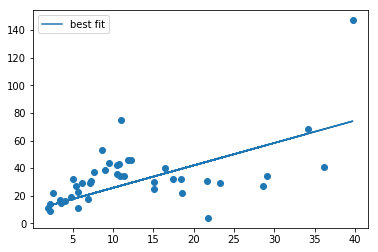

In [115]:
plt.scatter(a,c)
plt.plot(a,sess.run(W)*a + sess.run(b),label="best fit")
plt.legend()
plt.show()